<a href="https://colab.research.google.com/github/w217423151/Midterm-ITAI-1371-Group-4/blob/Maria/MIDTERM_DATA_SET_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOADING THE LIBRARY**

In [36]:
import numpy as np
import pandas as pd

import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# **STEP 0. LOAD THE DATA SET INTO THE PROGRAM**

In [37]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file
df = pd.read_csv('/adult.csv')

# Check the first rows
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [38]:
#GET BASISC INFORMATION ABOUT THE DATASET
print("Dataset Info:")
print(df.info())

print("\nDataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nColumn Names:")
print(df.columns.tolist())
print(f"Dataset created with {len(df)} participant")

#CHECK DATA TYPE
print("data types:")
print(df.dtypes)

print("\nNumerical Columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_cols)

print("\nCategorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Dataset Shape:
Rows: 32561, Columns: 15

Column Names:
['age', 'workclass

| #  | Column Name      | Non-null Count | Data Type | Variable Type              |
|----|------------------|----------------|------------|-----------------------------|
| 0  | age              | 32561          | int64      | Numerical (continuous)      |
| 1  | workclass        | 32561          | object     | Categorical (nominal)       |
| 2  | fnlwgt           | 32561          | int64      | Numerical (continuous)      |
| 3  | education        | 32561          | object     | Categorical (nominal)       |
| 4  | education.num    | 32561          | int64      | Ordinal (discrete)          |
| 5  | marital.status   | 32561          | object     | Categorical (nominal)       |
| 6  | occupation       | 32561          | object     | Categorical (nominal)       |
| 7  | relationship     | 32561          | object     | Categorical (nominal)       |
| 8  | race             | 32561          | object     | Categorical (nominal)       |
| 9  | sex              | 32561          | object     | Categorical (binary)        |
| 10 | capital.gain     | 32561          | int64      | Numerical (continuous)      |
| 11 | capital.loss     | 32561          | int64      | Numerical (continuous)      |
| 12 | hours.per.week   | 32561          | int64      | Numerical (continuous)      |
| 13 | native.country   | 32561          | object     | Categorical (nominal)       |
| 14 | income           | 32561          | object     | Categorical (binary)        |


# **STEP 1. GENERAL ANALYSIS (DATA QUALITY)**

In [39]:
# CHECK FOR MISSING VALUES
df = pd.read_csv("/adult.csv", na_values='?')
print("Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)



Missing Values:
                Missing Count  Missing Percentage
occupation               1843            5.660146
workclass                1836            5.638647
native.country            583            1.790486


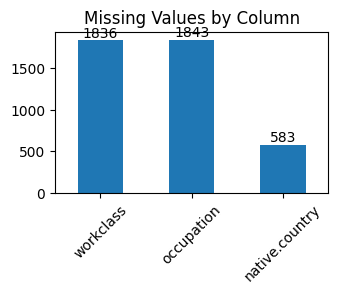

In [40]:
plt.subplot(2, 2, 2)
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

ax = missing_counts.plot(kind='bar')
plt.title('Missing Values by Column')
plt.xticks(rotation=45)

# Add values on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Position text at the center of the bar
        p.get_height() + 0.5,           # Position text slightly above the bar
        int(p.get_height()),             # Text to display (bar height)
        ha='center',                     # Horizontal alignment: center
        va='bottom'                      # Vertical alignment: bottom
    )

plt.tight_layout()
plt.show()

In [41]:
# CHECK FOR DUPLICATE
print(f"Total rows: {len(df)}")
print(f"Unique rows: {len(df.drop_duplicates())}")
print(f"Duplicate rows: {len(df) - len(df.drop_duplicates())}")
duplicate_percentage = ((len(df) - len(df.drop_duplicates())) / len(df)) * 100
print(f"Duplicate percentage: {duplicate_percentage:.2f}%")




Total rows: 32561
Unique rows: 32537
Duplicate rows: 24
Duplicate percentage: 0.07%


In [42]:
#SHOWS THE DUPLICATE ROW IN THE DATA SET
if len(df) != len(df.drop_duplicates()):
    print("\nDuplicate rows found:")
    duplicates = df[df.duplicated(keep=False)]
    print(duplicates)


Duplicate rows found:
       age         workclass  fnlwgt     education  education.num  \
6227    90           Private   52386  Some-college             10   
7615    19           Private  251579  Some-college             10   
7978    25           Private  308144     Bachelors             13   
8356    21           Private  250051  Some-college             10   
8453    25           Private  308144     Bachelors             13   
8500    38           Private  207202       HS-grad              9   
8645    90           Private   52386  Some-college             10   
9067    27           Private  255582       HS-grad              9   
9269    20           Private  107658  Some-college             10   
9305    25           Private  195994       1st-4th              2   
10307   19           Private  138153  Some-college             10   
10357   49  Self-emp-not-inc   43479  Some-college             10   
11121   49           Private   31267       7th-8th              4   
11261   21 

In [43]:
# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier Detection (using IQR method):")
for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    outliers, lower, upper = detect_outliers(df, col)
    print(f"\n{col}:")
    print(f"  Normal range: {lower:.2f} to {upper:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")

Outlier Detection (using IQR method):

age:
  Normal range: -2.00 to 78.00
  Number of outliers: 143
  Percentage of outliers: 0.44%

fnlwgt:
  Normal range: -61009.00 to 415887.00
  Number of outliers: 992
  Percentage of outliers: 3.05%

education.num:
  Normal range: 4.50 to 16.50
  Number of outliers: 1198
  Percentage of outliers: 3.68%

capital.gain:
  Normal range: 0.00 to 0.00
  Number of outliers: 2712
  Percentage of outliers: 8.33%

capital.loss:
  Normal range: 0.00 to 0.00
  Number of outliers: 1519
  Percentage of outliers: 4.67%

hours.per.week:
  Normal range: 32.50 to 52.50
  Number of outliers: 9008
  Percentage of outliers: 27.66%


### Data Quality and Outlier Summary

#### Missing Values

| Column Name     | Missing Count | Missing Percentage |
|-----------------|----------------|--------------------|
| occupation      | 1843           | 5.66%              |
| workclass       | 1836           | 5.64%              |
| native.country  | 583            | 1.79%              |
-----
### Duplicate Rows Summary

| Metric               | Count  | Percentage |
|----------------------|--------|------------|
| Total rows           | 32,561 | 100%       |
| Unique rows          | 32,537 | 99.93%     |
| Duplicate rows       | 24     | 0.07%      |

---

#### Outlier Detection (IQR Method)

| Variable        | Normal Range             | Number of Outliers | Percentage of Outliers |
|-----------------|--------------------------|--------------------|------------------------|
| age             | -2.00 to 78.00           | 143                | 0.44%                 |
| fnlwgt          | -61,009.00 to 415,887.00 | 992                | 3.05%                 |
| education.num   | 4.50 to 16.50            | 1,198              | 3.68%                 |
| capital.gain    | 0.00 to 0.00             | 2,712              | 8.33%                 |
| capital.loss    | 0.00 to 0.00             | 1,519              | 4.67%                 |
| hours.per.week  | 32.50 to 52.50           | 9,008              | 27.66%                |


# **STEP 1.2 GENERAL CLEANING OF THE DATA SET**

In [44]:
df.replace('?', pd.NA, inplace=True)

# Drop duplicate rows
df = df.drop_duplicates()

# Optional: reset index
df.reset_index(drop=True, inplace=True)

# Verify changes
print("After cleaning:")
print(f"Total rows: {len(df)}")
print(f"Unique rows: {len(df.drop_duplicates())}")
print(f"Duplicate rows: {len(df) - len(df.drop_duplicates())}")
print(df.isna().sum())



After cleaning:
Total rows: 32537
Unique rows: 32537
Duplicate rows: 0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64


### Missing Values After Cleaning (Only Non-Zero)

| Column Name       | Missing Count | Missing Percentage |
|------------------|---------------|------------------|
| workclass        | 1,836         | 5.64%            |
| occupation       | 1,843         | 5.66%            |
| native.country   | 582           | 1.79%            |

**Dataset Summary After Cleaning:**

| Metric           | Count   | Percentage |
|-----------------|---------|------------|
| Total rows      | 32,537  | 100%       |
| Unique rows     | 32,537  | 100%       |
| Duplicate rows  | 0       | 0.00%      |

**Interpretation:**  
After cleaning, all duplicates were removed and `?` values converted to nulls. Only **workclass, occupation, and native.country** still have missing values. These columns may require further handling (e.g., imputation or row removal) before analysis.  


# **STEP 2. BASIC STATISTIC OF THE DATA SET**

#**STEP 2.1 BASIC STATISTICS FOR NUMERICAL VARIABLES**

In [45]:
# BASIC SUMMARY STATISTICS
print("Summary Statistics for Numerical Variables:")
summary_stats = df.describe()
display(summary_stats.round(2))

Summary Statistics for Numerical Variables:


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00
mean,38.59,189780.85,10.08,1078.44,87.37,40.44
std,13.64,105556.47,2.57,7387.96,403.10,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,236993.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [46]:
# ADDTIONAL STATISTICS FOR NUMERICAL VARIABLES. DESCRRIBE THE SHAPE AND BEHAVIOR OF THE DATA DISTRIBUTION, WICH IS KEY FOR DEEPETER CLEANIND AND MODELING
print("Additional Statistics:")
additional_stats = pd.DataFrame({
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis(),
    'Variance': df[numerical_cols].var()
})
display(additional_stats.round(3))

Additional Statistics:


,Skewness,Kurtosis,Variance
age,0.558,-0.170,1.859950e+02
fnlwgt,1.448,6.222,1.114217e+10
education.num,-0.310,0.619,6.613000e+00
capital.gain,11.949,154.683,5.458191e+07
capital.loss,4.593,20.358,1.624911e+05
hours.per.week,0.229,2.918,1.524460e+02


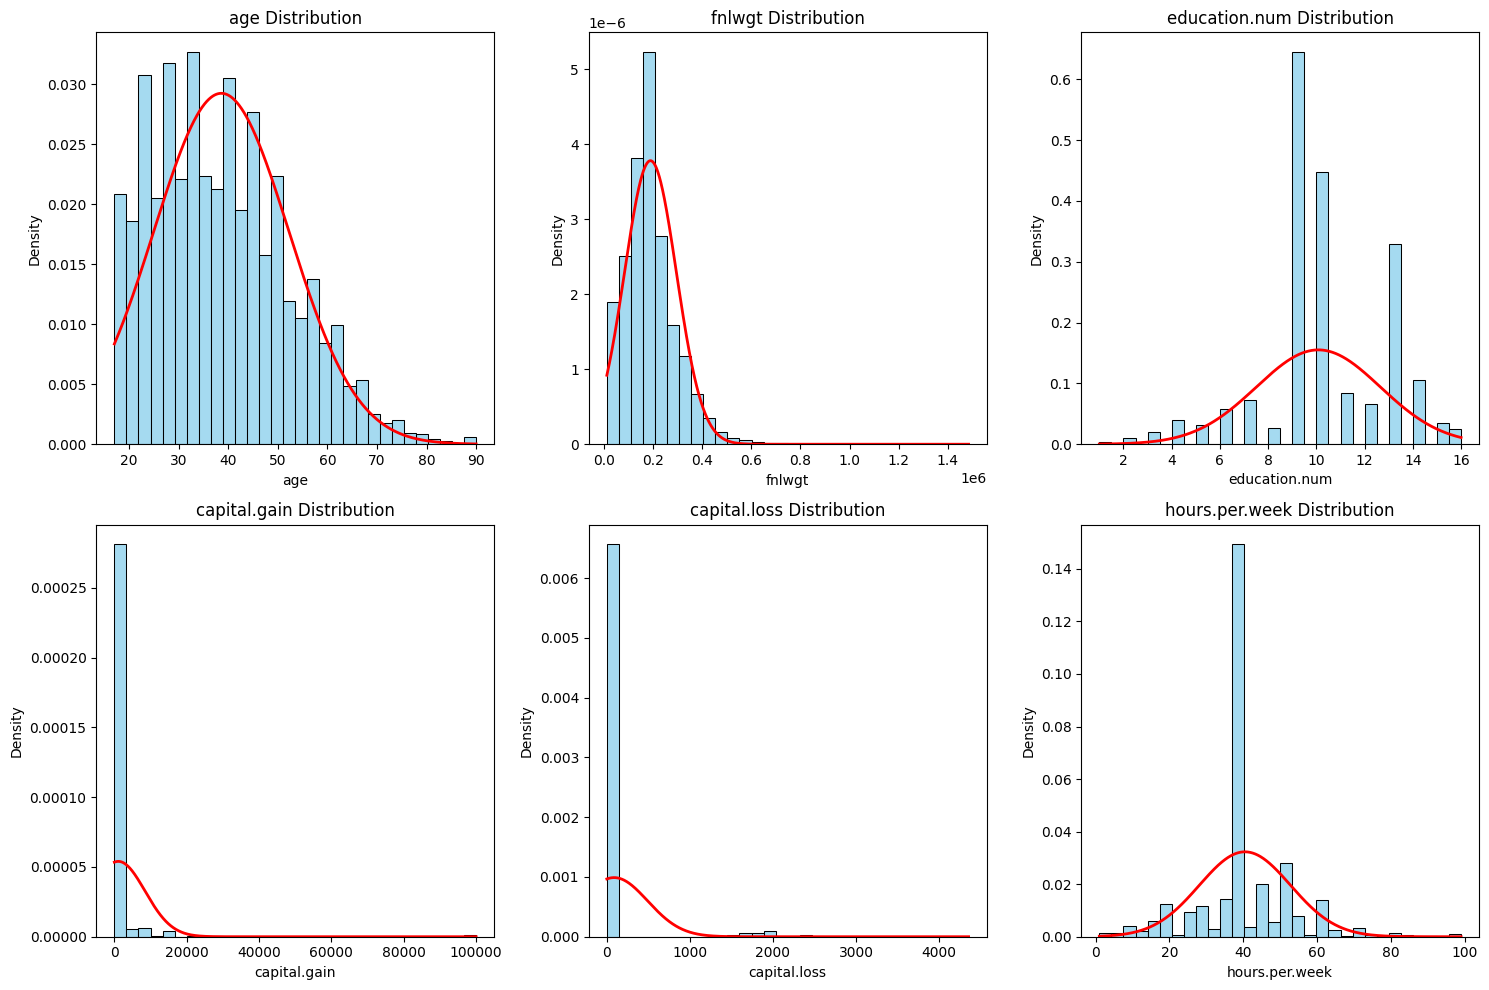

In [47]:
# List of variables to check
variables = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], kde=False, stat="density", bins=30, color='skyblue', edgecolor='black')

    # Overlay normal distribution curve
    mu = df[var].mean()
    sigma = df[var].std()
    x = np.linspace(df[var].min(), df[var].max(), 1000)
    plt.plot(x, norm.pdf(x, mu, sigma), color='red', lw=2)

    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

Summary: Most of your financial variables (capital.gain and capital.loss) are far from normal, with extreme outliers. Demographic variables like age and hours.per.week are reasonably normal.

#**STEP 2.2 BASIC STATISTICS FOR CATEGORICAL VARIABLES**

In [48]:
# Summary for categorical variables
print("Summary for Categorical Variables:")
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages })
    print(summary.round(2))

Summary for Categorical Variables:

workclass:
                  Count  Percentage
workclass                          
Private           22673       73.85
Self-emp-not-inc   2540        8.27
Local-gov          2093        6.82
State-gov          1298        4.23
Self-emp-inc       1116        3.64
Federal-gov         960        3.13
Without-pay          14        0.05
Never-worked          7        0.02

education:
              Count  Percentage
education                      
HS-grad       10494       32.25
Some-college   7282       22.38
Bachelors      5353       16.45
Masters        1722        5.29
Assoc-voc      1382        4.25
11th           1175        3.61
Assoc-acdm     1067        3.28
10th            933        2.87
7th-8th         645        1.98
Prof-school     576        1.77
9th             514        1.58
12th            433        1.33
Doctorate       413        1.27
5th-6th         332        1.02
1st-4th         166        0.51
Preschool        50        0.15

mari

#**STEP 3. REMOVING COLUM FROM DATA SET**

WHY WE NEED REMOVE COLUMNS?

The variable **fnlwgt** is undefined in the database. It can be assumed to represent a composite indicator derived from a previous linear equation.

The variable **education** appears twice in the dataset: once as a string and once as an integer. Since both columns contain the same information, the string version should be removed.

The variable **capital.gain** should be removed because the value 0 appears 29,849 times, representing approximately 96% of the total data (N=32,561). Its distribution is extremely right-skewed (skewness = 11.95) with very high kurtosis (154.68).

The variable **capital.loss** should be removed because the value 0 appears 31,042 times, representing 98% of the total data (N=32,561). Its distribution is highly skewed (skewness = 4.59) with heavy tails (kurtosis = 20.36).

In [49]:
# DROP UNNECESARY COLUMN
df = df.drop(['fnlwgt', 'education', 'capital.loss', 'capital.gain'], axis=1)

# Check the shape after cleaning
print("After cleaning:", df.shape)

# Verify which columns remain
print("Current columns:", df.columns)

# Display the first rows to visually confirm
df.head()

After cleaning: (32537, 11)
Current columns: Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


#**STEP 4. DATA SET VISUALIZATION**

Data visualization is important because it helps us understand complex information quickly. It shows patterns, trends, and relationships that are hard to see in raw data. It also helps detect errors or outliers more easily. Finally, it allows us to communicate insights clearly and make better decisions

#**STEP 4.1 NUMERICAL VARIABLES VISUALIZATION**

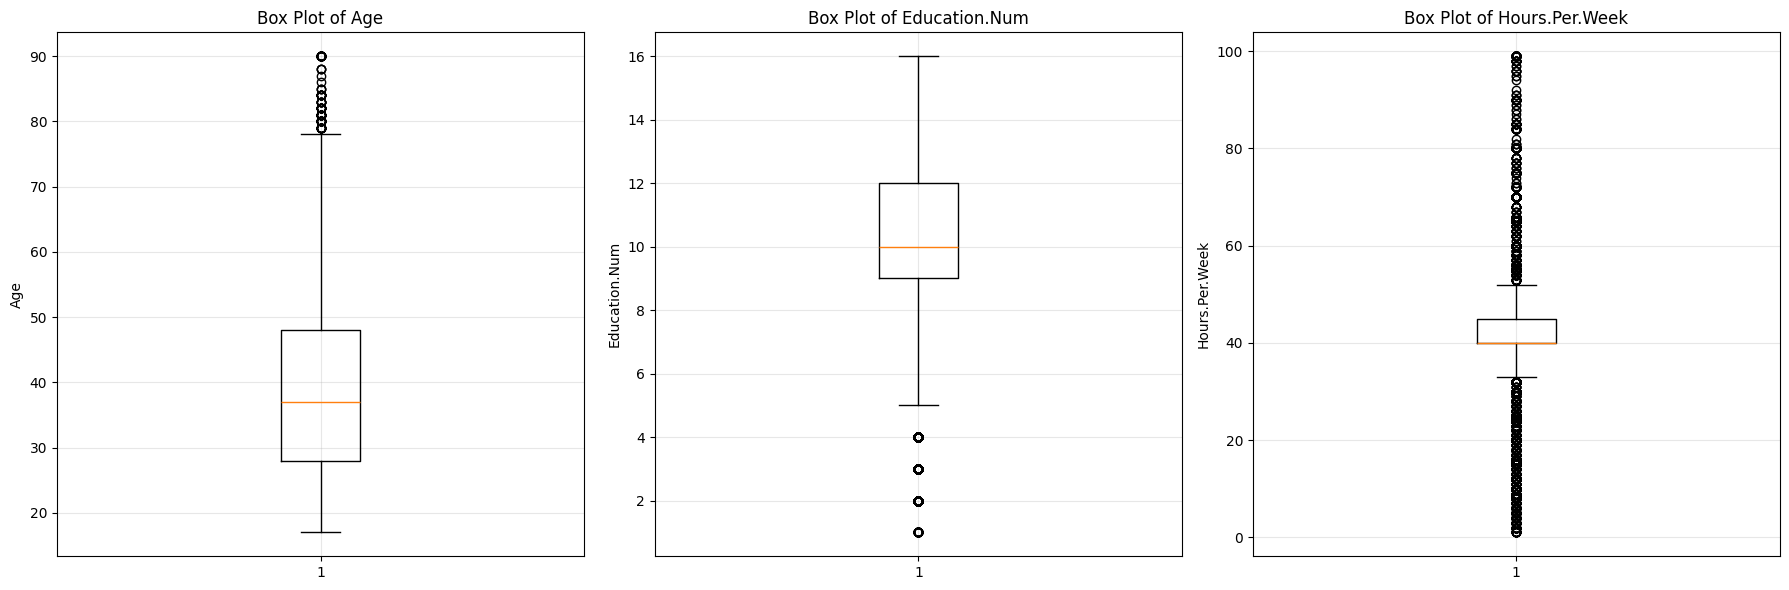

In [50]:
# BOX PLOT FOR NUMERICAL VARIABLES IN DATA SET (AGE, EDUCATION.NUM, HOURS.PER.WEEK)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
numerical_vars = ['age', 'education.num', 'hours.per.week']

for i, var in enumerate(numerical_vars):
    axes[i].boxplot(df[var].dropna())
    axes[i].set_title(f'Box Plot of {var.replace("_", " ").title()}')
    axes[i].set_ylabel(var.replace("_", " ").title())
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#**STEP 4.2 CATEGORICAL VARIABLES VISUALIZATION**

/tmp/ipython-input-319226691.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')
/tmp/ipython-input-319226691.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')
/tmp/ipython-input-319226691.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')
/tmp/ipython-input-319226691.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

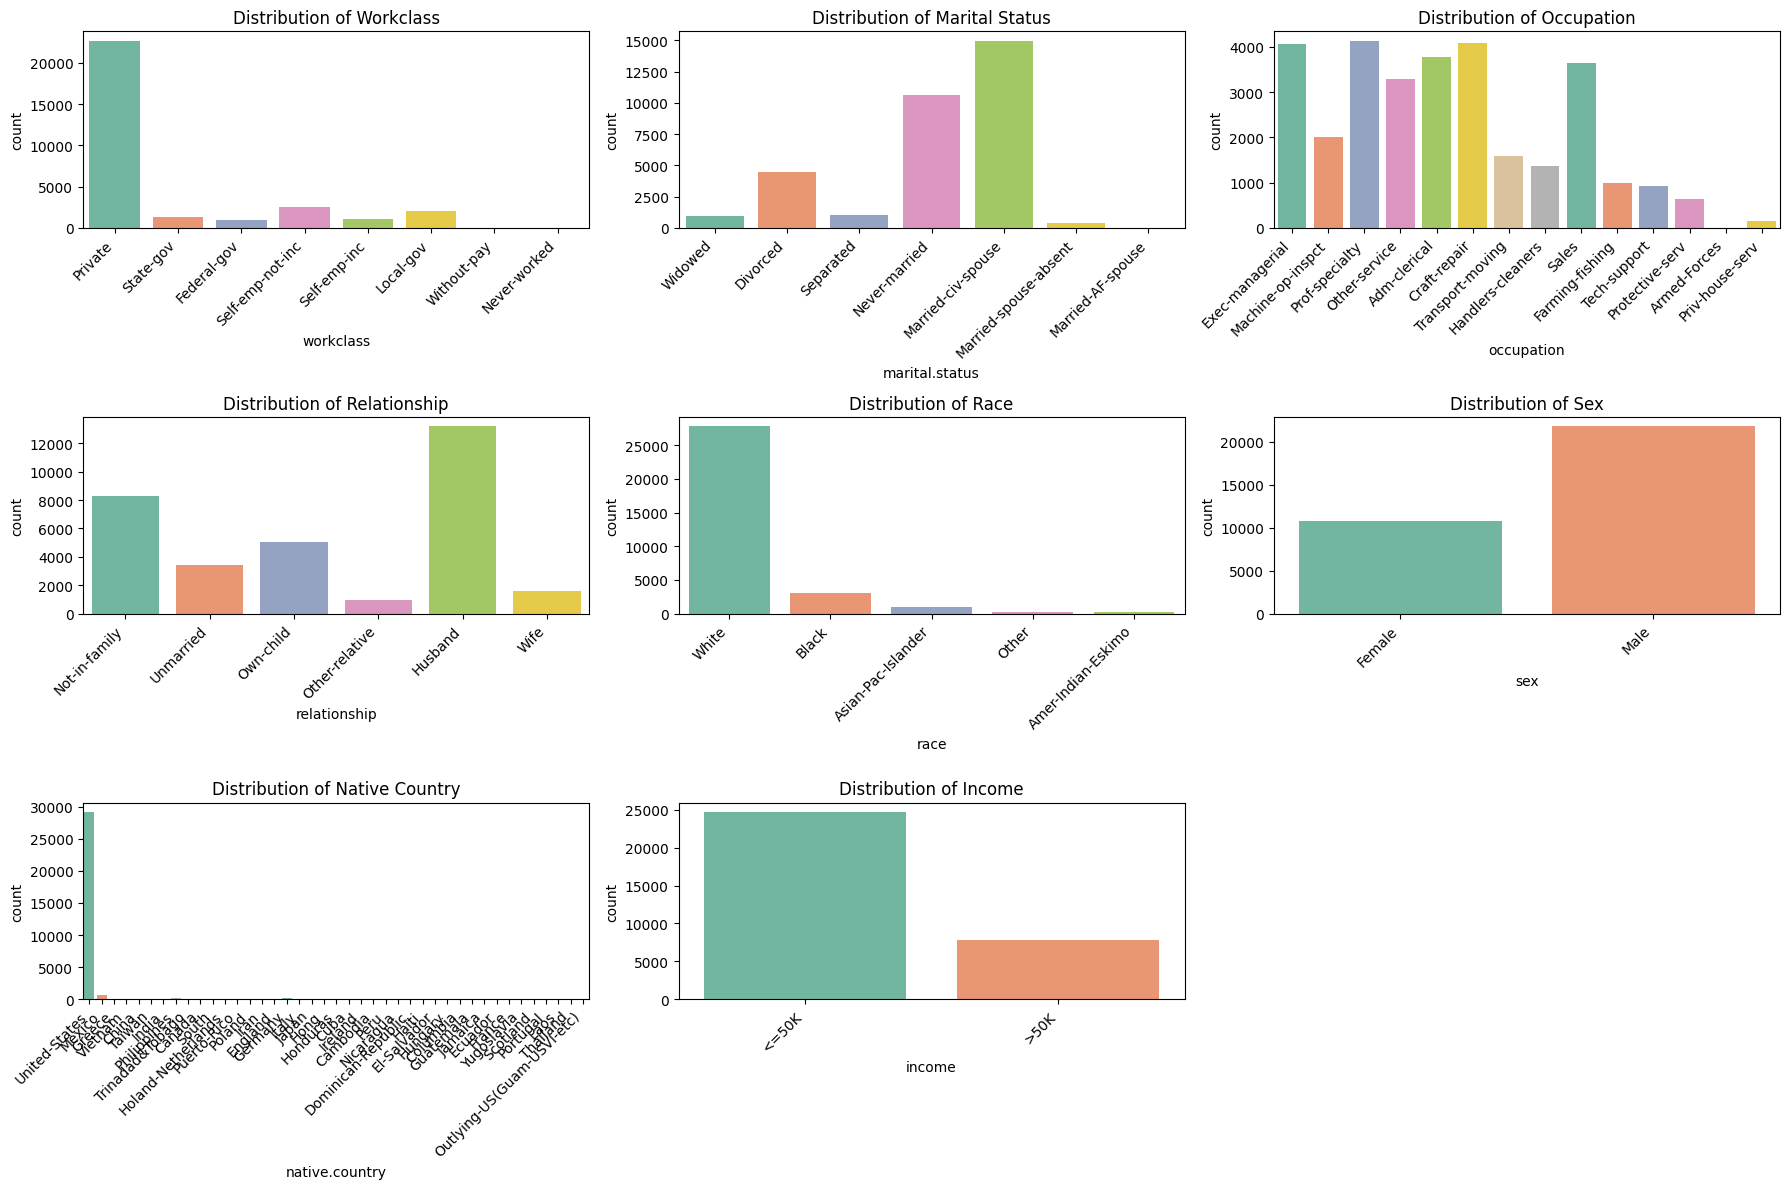

In [51]:
#PIE CHART FOR CATEGORICAL VARIABLES

# List of categorical variables
categorical_vars = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']

# Set the figure size
plt.figure(figsize=(18, 12))

# Loop through each variable to create a count plot

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.countplot(x=var, data=df, palette='Set2')
    plt.title(f'Distribution of {var.replace(".", " ").title()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

#**STEP 5. CORRELATION ANALYSIS**

Correlation analysis for numerical variables helps us understand which variables are related and which are not. At the beginning, when we have an uncleaned dataset, correlations can be low because the program calculates relationships including missing values, errors, or extreme outliers that distort the true associations. Additionally, the data distribution can be very spread out due to outliers, skewed values, or measurement errors.
One way to address this problem for data that do not follow a normal distribution is by applying a transformation technique, such as logarithmic, square root, or Box-Cox transformation, to reduce skewness and make the distribution more normal, which improves correlation estimates.




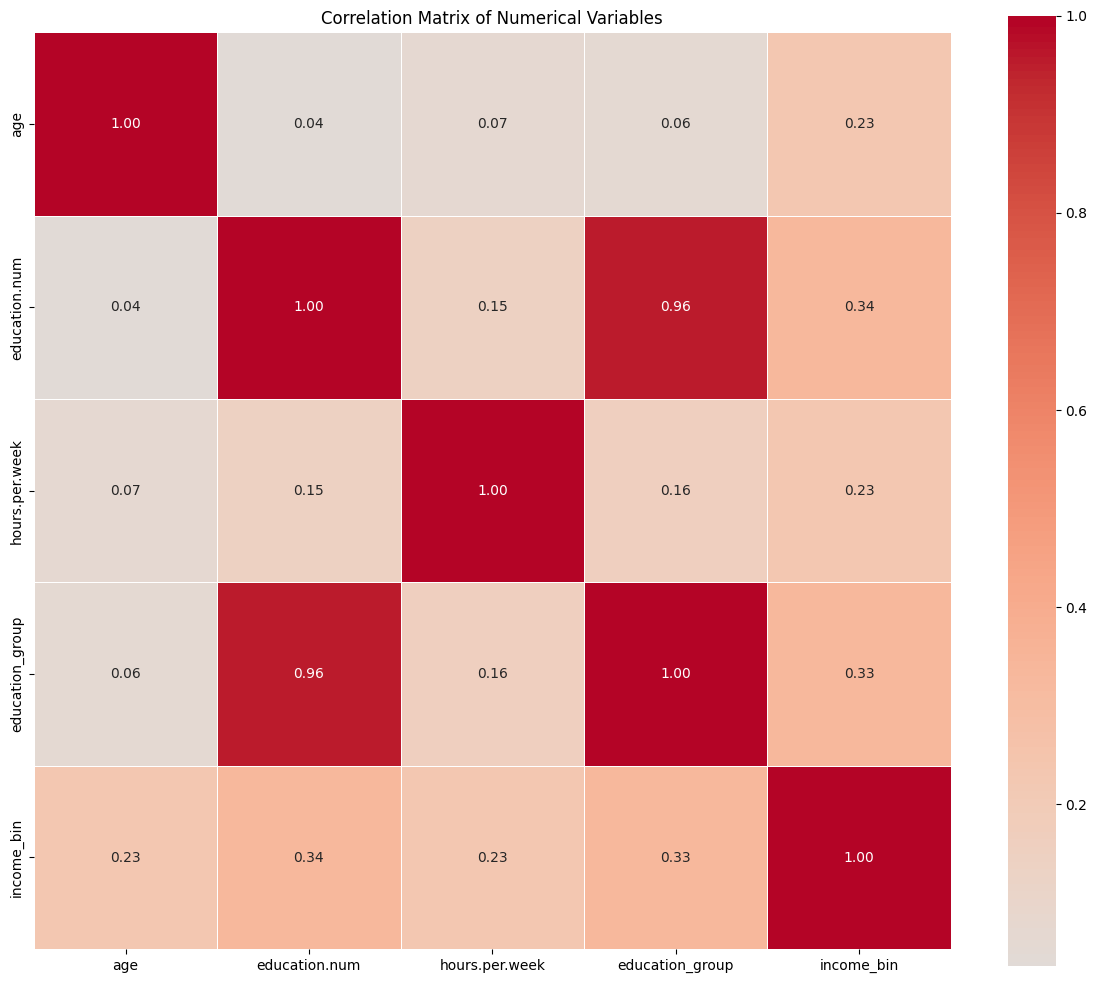

Strong Correlations (|r| > 0.5):
education.num vs education_group: 0.957


In [86]:
# Correlation matrix
import seaborn as sns

# Update numerical_cols to reflect current columns in df
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()


correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print strong correlations
print("Strong Correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.3f}")

In [ ]:
Interpreta

#**STEP 6. IMPUTATION STRATEGIES FOR MISSING VALUES**

Comparing distributions before and after imputation is crucial because it helps us determine if the imputed values are changing the original data structure. For continuous numerical variables, using histograms allows us to see if the distribution's shape (such as skewness, peaks, and ranges) stays consistent after imputation; major changes could suggest the imputation method isn't suitable. For categorical variables, bar charts enable us to compare category frequencies before and after filling missing data, making sure the class proportions remain accurate. Overall, this visual comparison verifies that the imputation maintains the original data patterns and information.

In [52]:
# Create a copy for preprocessing
df_processed = df.copy()

#**STEP 6.1 IMPUTATION ESTRATEGIES FOR CATEGORICAL VALUES**

### Missing Values Summary

| Variable        | Missing Count | Missing Percentage |
|-----------------|----------------|---------------------|
| occupation       | 1843           | 5.66%              |
| workclass        | 1836           | 5.64%              |
| native.country   | 583            | 1.79%              |



In [53]:
# Strategy: Mode imputation for occupation (categorical)
occupation_mode = df_processed['occupation'].mode().iloc[0]
df_processed['occupation'].fillna(occupation_mode, inplace=True)
print(f"Filled occupation with mode: {occupation_mode}")

# Strategy: Mode imputation for workclass (categorical)
workclass_mode = df_processed['workclass'].mode().iloc[0]
df_processed['workclass'].fillna(workclass_mode, inplace=True)
print(f"Filled workclass with mode: {workclass_mode}")

# Strategy: Mode imputation for native.country (categorical)
native_country_mode = df_processed['native.country'].mode().iloc[0]
df_processed['native.country'].fillna(native_country_mode, inplace=True)
print(f"Filled native.country with mode: {native_country_mode}")

print(f"\nMissing values after imputation: {df_processed.isnull().sum().sum()}")

Filled occupation with mode: Prof-specialty
Filled workclass with mode: Private
Filled native.country with mode: United-States

Missing values after imputation: 0


/tmp/ipython-input-509749857.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['occupation'].fillna(occupation_mode, inplace=True)
/tmp/ipython-input-509749857.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

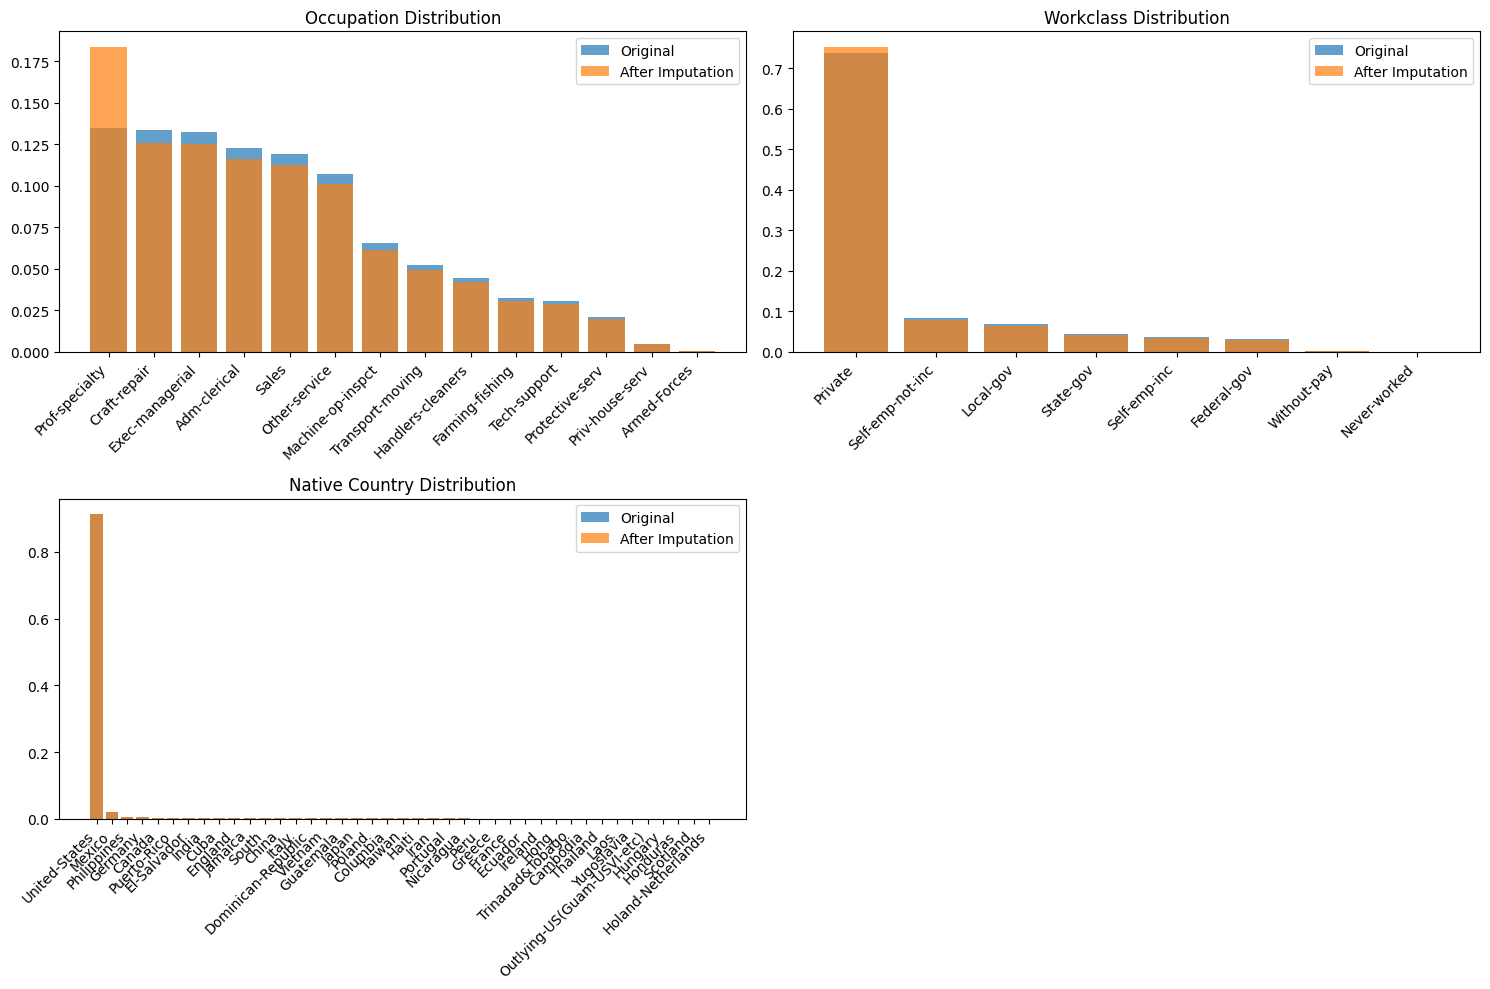

In [56]:
# Compare distributions before and after imputation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Occupation
original_occ = df['occupation'].value_counts(normalize=True)
imputed_occ = df_processed['occupation'].value_counts(normalize=True)
axes[0, 0].bar(range(len(original_occ)), original_occ.values, alpha=0.7, label='Original')
axes[0, 0].bar(range(len(imputed_occ)), imputed_occ.values, alpha=0.7, label='After Imputation')
axes[0, 0].set_xticks(range(len(original_occ)))
axes[0, 0].set_xticklabels(original_occ.index, rotation=45, ha='right')
axes[0, 0].set_title('Occupation Distribution')
axes[0, 0].legend()

# Workclass
original_wc = df['workclass'].value_counts(normalize=True)
imputed_wc = df_processed['workclass'].value_counts(normalize=True)
axes[0, 1].bar(range(len(original_wc)), original_wc.values, alpha=0.7, label='Original')
axes[0, 1].bar(range(len(imputed_wc)), imputed_wc.values, alpha=0.7, label='After Imputation')
axes[0, 1].set_xticks(range(len(original_wc)))
axes[0, 1].set_xticklabels(original_wc.index, rotation=45, ha='right')
axes[0, 1].set_title('Workclass Distribution')
axes[0, 1].legend()

# Native Country
original_country = df['native.country'].value_counts(normalize=True)
imputed_country = df_processed['native.country'].value_counts(normalize=True)
axes[1, 0].bar(range(len(original_country)), original_country.values, alpha=0.7, label='Original')
axes[1, 0].bar(range(len(imputed_country)), imputed_country.values, alpha=0.7, label='After Imputation')
axes[1, 0].set_xticks(range(len(original_country)))
axes[1, 0].set_xticklabels(original_country.index, rotation=45, ha='right')
axes[1, 0].set_title('Native Country Distribution')
axes[1, 0].legend()

# Hide the unused subplot at axes[1, 1]
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

**Observation**:After the imputation, the distribution of the values did not change significantly, since the percentage of missing values was small.In this context, the imputation using the **mode** was appropriate because it preserved the original structure of the categorical variables without altering the proportion of the dominant categories. Furthermore, since the post-imputation distribution remained almost identical to the initial one, it ensures that the model will not include bias from excessive or distorted replacement. Therefore, the dataset quality remains stable and ready for further analysis or modeling.


#**STEP 7. HOW CAN WE ENCONDE THE CATEGORICAL VARIABLES?**
Categorical variables are data strings, so they need to be converted into numbers, as that is the language understood by machine learning algorithms.

In [57]:
# Identify categorical columns
categorical_columns = [
    'workclass', 'marital.status', 'occupation',
    'relationship', 'race', 'sex', 'native.country', 'income'
]

print("Summary of Categorical Variables:\n")

for col in categorical_columns:
    unique_values = df_processed[col].unique()
    unique_count = df_processed[col].nunique()

    # Limit display if there are too many unique categories
    display_values = list(unique_values[:10])  # show first 10 only
    if unique_count > 10:
        display_values.append("...")

    print(f"{col.title()}:")
    print(f"  • Unique values: {unique_count}")
    print(f"  • Examples: {display_values}\n")

Summary of Categorical Variables:

Workclass:
  • Unique values: 8
  • Examples: ['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked']

Marital.Status:
  • Unique values: 7
  • Examples: ['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']

Occupation:
  • Unique values: 14
  • Examples: ['Prof-specialty', 'Exec-managerial', 'Machine-op-inspct', 'Other-service', 'Adm-clerical', 'Craft-repair', 'Transport-moving', 'Handlers-cleaners', 'Sales', 'Farming-fishing', '...']

Relationship:
  • Unique values: 6
  • Examples: ['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative', 'Husband', 'Wife']

Race:
  • Unique values: 5
  • Examples: ['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']

Sex:
  • Unique values: 2
  • Examples: ['Female', 'Male']

Native.Country:
  • Unique values: 41
  • Examples: ['United-States', 'Mexico', 'Greec

#**7.1 ENCONDE VARIABLE: WORKCLASS**
To assign a natural order to the "workclass" variable based on average income indicators in the United States, we can consider the typical earnings associated with each employment type. While specific data for each category may not be readily available, we can infer a general ranking based on industry classifications and available income statistics.

**Proposed Order Based on Average Income:**

**Federal-gov**: Typically associated with higher-paying government positions.

**State-gov**: State government roles often offer competitive salaries.

**Local-gov**: Local government positions can vary but generally offer stable pay.

**Self-emp-in**c: Self-employed individuals with incorporated businesses may have higher earnings potential.

**Private**: Private sector jobs can vary widely in pay, but many offer competitive salaries.

**Self-emp-not-inc**: Self-employed individuals without incorporation may have more variable incomes.

**Never-worked**: Individuals who have never worked may have lower or no income.

**Without-pay**: Typically refers to individuals not currently earning income.

References

Bureau of Labor Statistics. “Median Weekly Earnings by Occupation, Full-Time Wage and Salary Workers.” U.S. Bureau of Labor Statistics, U.S. Department of Labor, 2025, https://www.bls.gov/cps/cpsaat39.htm
. Accessed 27 Oct. 2025.

Federal Reserve Bank of St. Louis. “Self-Employment Income by Occupation.” FRED Economic Data, Federal Reserve Bank of St. Louis, 2025, https://fred.stlouisfed.org/series/CXUSFEMPINCLB1206M
. Accessed 27 Oct. 2025.

U.S. Census Bureau. “Employment Status and Class of Worker Tables.” U.S. Census Bureau, 2025, https://www.census.gov/data/tables/2025/demo/labor-force/cow-employment-characteristics.html
. Accessed 27 Oct. 2025.

Categories (ordered): Index(['Without-pay', 'Never-worked', 'Self-emp-not-inc', 'Private',
       'Self-emp-inc', 'Local-gov', 'State-gov', 'Federal-gov'],
      dtype='object')

First 10 values with codes:
0    3
1    3
2    3
3    3
4    3
dtype: int8


/tmp/ipython-input-1259123647.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='workclass', data=df_processed, order=workclass_order, palette='pastel', ax=axes[0])
/tmp/ipython-input-1259123647.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/tmp/ipython-input-1259123647.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_processed['workclass'].cat.codes, palette='muted', ax=axes[1])


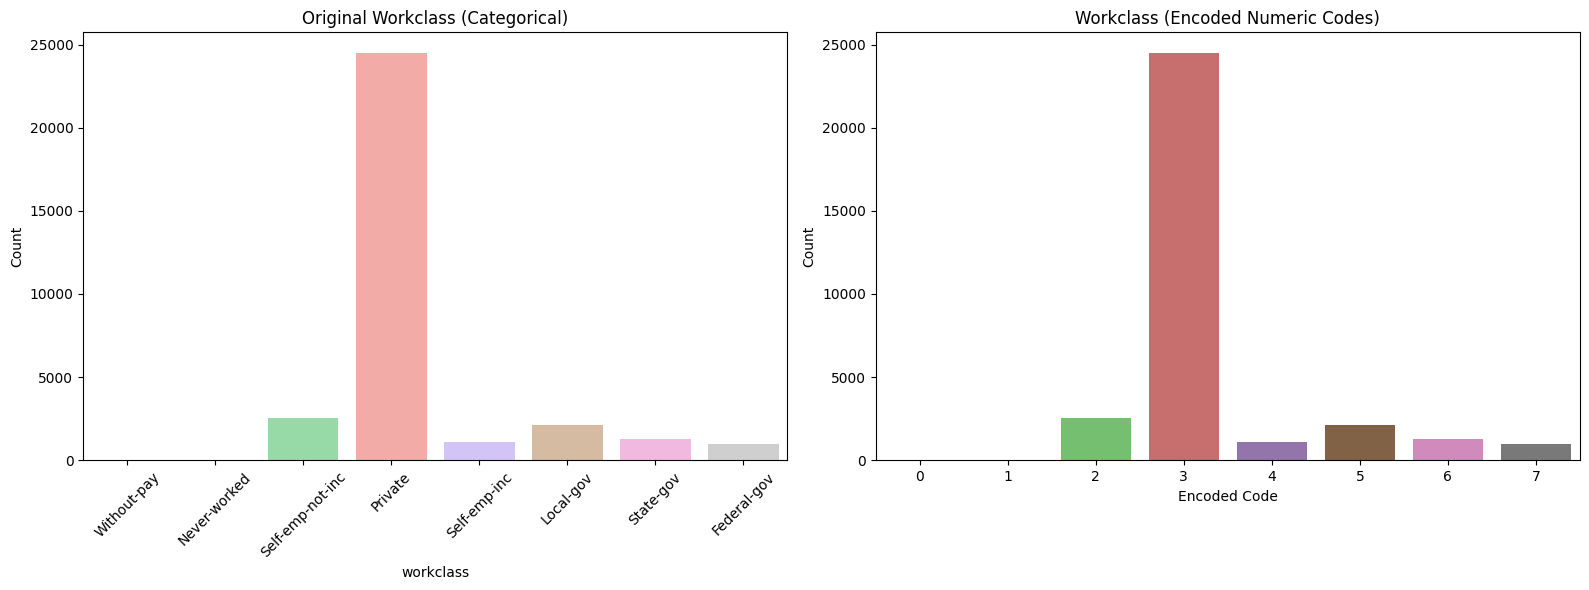

In [88]:
# CATEGORICAL VARIABLE WORKCLASS (ORDINAL)
workclass_order = [
    'Without-pay', 'Never-worked', 'Self-emp-not-inc', 'Private',
    'Self-emp-inc', 'Local-gov', 'State-gov', 'Federal-gov'
]

df_processed['workclass'] = pd.Categorical(df_processed['workclass'], categories=workclass_order, ordered=True)

# Check the categories
print("Categories (ordered):", df_processed['workclass'].cat.categories)

# Check first few encoded values
print("\nFirst 10 values with codes:")
print(df_processed['workclass'].head().cat.codes)

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Original categorical distribution
sns.countplot(x='workclass', data=df_processed, order=workclass_order, palette='pastel', ax=axes[0])
axes[0].set_title('Original Workclass (Categorical)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Encoded numeric codes distribution
sns.countplot(x=df_processed['workclass'].cat.codes, palette='muted', ax=axes[1])
axes[1].set_title('Workclass (Encoded Numeric Codes)')
axes[1].set_xlabel('Encoded Code')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()





#**7.3 ENCONDE VARIABLE: MARITAL STATUS**

The first step is to recode the variable, because the original data has a highly uneven distribution. In the original categories, the distribution is:

| Category              | Count | Percentage |
| --------------------- | ----- | ---------- |
| Married-civ-spouse    | 14970 | 46.01%     |
| Never-married         | 10667 | 32.78%     |
| Divorced              | 4441  | 13.65%     |
| Separated             | 1025  | 3.15%      |
| Widowed               | 993   | 3.05%      |
| Married-spouse-absent | 418   | 1.28%      |
| Married-AF-spouse     | 23    | 0.07%      |

To obtain a more homogeneous distribution, the variable is reduced to two categories:

| New Category | Original Categories Included                                 | Approx. Count | Approx. % |
| ------------ | ------------------------------------------------------------ | ------------- | --------- |
| Married      | Married-civ-spouse, Married-spouse-absent, Married-AF-spouse | 15411         | 47.36%    |
| Not Married  | Never-married, Divorced, Separated, Widowed                  | 17136         | 52.64%    |

This recoding balances the classes reduce sparsity, and simplifies the variables for machine learning.



marital_grouped
Not Married    17126
Married        15411
Name: count, dtype: int64
marital_grouped
Not Married    52.635461
Married        47.364539
Name: proportion, dtype: float64
  marital_grouped  marital_grouped_num
0     Not Married                    0
1     Not Married                    0
2     Not Married                    0
3     Not Married                    0
4     Not Married                    0
marital_grouped_num
0    17126
1    15411
Name: count, dtype: int64


/tmp/ipython-input-2154067131.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital.status', data=df_processed, palette='pastel', ax=axes[0])
/tmp/ipython-input-2154067131.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/tmp/ipython-input-2154067131.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital_grouped_num', data=df_processed, palette='muted', ax=axes[1])


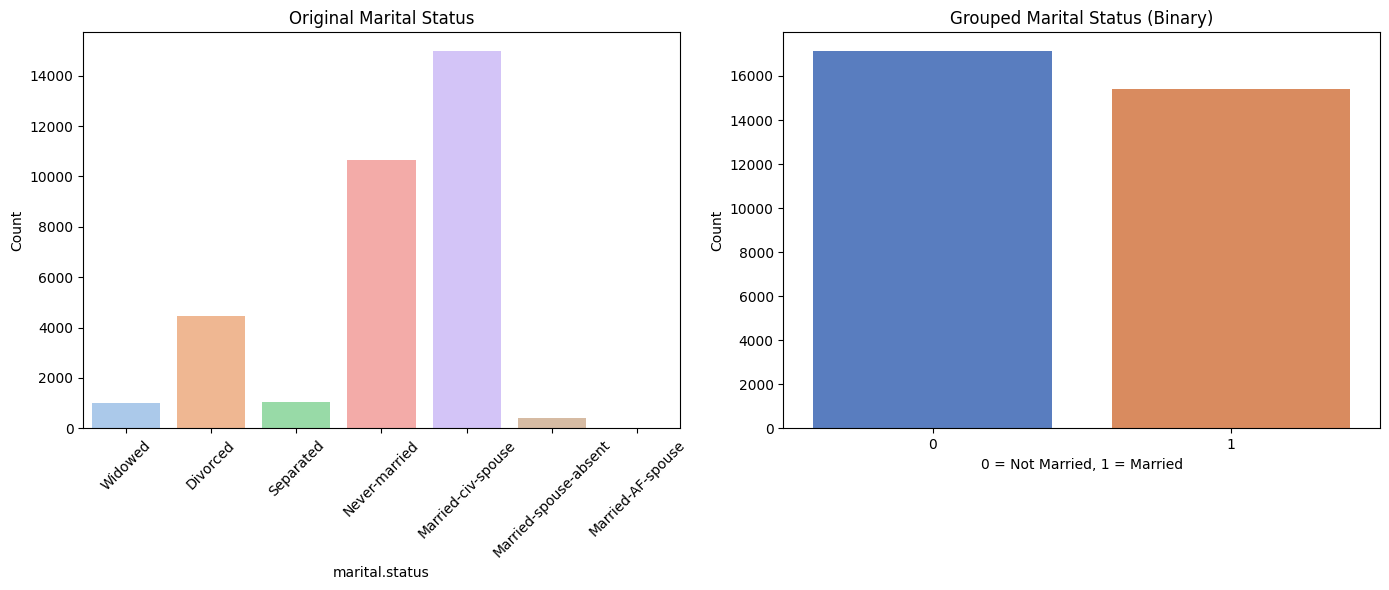

In [89]:
# Recode marital.status into two categories
df_processed['marital_grouped'] = df_processed['marital.status'].replace({
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married',
    'Never-married': 'Not Married',
    'Divorced': 'Not Married',
    'Separated': 'Not Married',
    'Widowed': 'Not Married'
})

# Verify the new distribution
print(df_processed['marital_grouped'].value_counts())
print(df_processed['marital_grouped'].value_counts(normalize=True) * 100)

# Convert the grouped marital status to numeric (binary)
df_processed['marital_grouped_num'] = df_processed['marital_grouped'].map({
    'Not Married': 0,
    'Married': 1
})

# Verify the conversion
print(df_processed[['marital_grouped', 'marital_grouped_num']].head())
print(df_processed['marital_grouped_num'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Original marital.status distribution
sns.countplot(x='marital.status', data=df_processed, palette='pastel', ax=axes[0])
axes[0].set_title('Original Marital Status')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Grouped binary marital status
sns.countplot(x='marital_grouped_num', data=df_processed, palette='muted', ax=axes[1])
axes[1].set_title('Grouped Marital Status (Binary)')
axes[1].set_xlabel('0 = Not Married, 1 = Married')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



#**7.2 ENCONDE VARIABLE: OCCUPATION (CATEGORICAL)**

| Occupation        | Count | %      |
| ----------------- | ----- | ------ |
| Prof-specialty    | 4136  | 13.47% |
| Craft-repair      | 4094  | 13.34% |
| Exec-managerial   | 4065  | 13.24% |
| Adm-clerical      | 3768  | 12.28% |
| Sales             | 3650  | 11.89% |
| Other-service     | 3291  | 10.72% |
| Machine-op-inspct | 2000  | 6.52%  |
| Transport-moving  | 1597  | 5.20%  |
| Handlers-cleaners | 1369  | 4.46%  |
| Farming-fishing   | 992   | 3.23%  |
| Tech-support      | 927   | 3.02%  |
| Protective-serv   | 649   | 2.11%  |
| Priv-house-serv   | 147   | 0.48%  |
| Armed-Forces      | 9     | 0.03%  |






The occupation variable has a highly uneven distribution, with some categories being very minor (e.g., Priv-house-serv or Armed-Forces). To reduce sparsity and simplify modeling, we can group occupations into four main categories:

| New Group            | Original Occupations Included                                              | Approx. Count | Approx. % |
| -------------------- | -------------------------------------------------------------------------- | ------------- | --------- |
| Professional/Manager | Prof-specialty, Exec-managerial                                            | 8201          | 26.71%    |
| Sales/Service        | Sales, Other-service, Protective-serv                                      | 7580          | 24.72%    |
| Manual/Operators     | Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners       | 9140          | 29.41%    |
| Others               | Adm-clerical, Tech-support, Farming-fishing, Priv-house-serv, Armed-Forces | 5833          | 19.16%    |


Minor and rare categories are grouped into “Others” to reduce sparsity. Also, the groups maintain semantic meaning while making the variable easier to use in machine learning models.This approach improves model stability and interpretability.


occupation_grouped
Professional/Manager    10044
Manual/Operators         9060
Sales/Service            7590
Others                   5843
Name: count, dtype: int64
occupation_grouped
Professional/Manager    30.869472
Manual/Operators        27.845222
Sales/Service           23.327289
Others                  17.958017
Name: proportion, dtype: float64
     occupation_grouped  occupation_grouped_num
0  Professional/Manager                       1
1  Professional/Manager                       1
2  Professional/Manager                       1
3      Manual/Operators                       3
4  Professional/Manager                       1
occupation_grouped_num
1    10044
3     9060
2     7590
4     5843
Name: count, dtype: int64


/tmp/ipython-input-4196935147.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='occupation', data=df_processed, palette='pastel', ax=axes[0])
/tmp/ipython-input-4196935147.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/tmp/ipython-input-4196935147.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='occupation_grouped_num', data=df_processed, palette='muted', ax=axes[1])


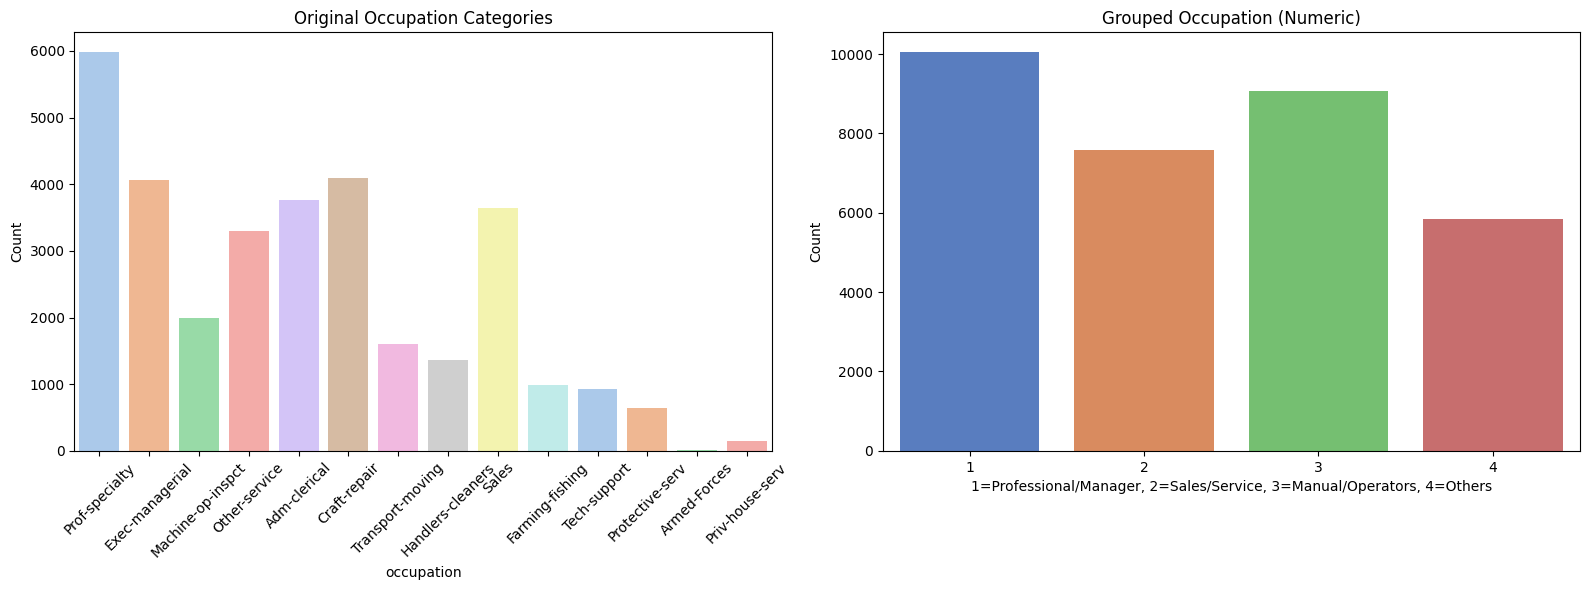

In [90]:
# Recode occupation into 4 main groups
df_processed['occupation_grouped'] = df_processed['occupation'].replace({
    'Prof-specialty': 'Professional/Manager',
    'Exec-managerial': 'Professional/Manager',
    'Sales': 'Sales/Service',
    'Other-service': 'Sales/Service',
    'Protective-serv': 'Sales/Service',
    'Craft-repair': 'Manual/Operators',
    'Machine-op-inspct': 'Manual/Operators',
    'Transport-moving': 'Manual/Operators',
    'Handlers-cleaners': 'Manual/Operators',
    'Adm-clerical': 'Others',
    'Tech-support': 'Others',
    'Farming-fishing': 'Others',
    'Priv-house-serv': 'Others',
    'Armed-Forces': 'Others'
})

# Verify the new distribution
print(df_processed['occupation_grouped'].value_counts())
print(df_processed['occupation_grouped'].value_counts(normalize=True) * 100)

# Map the 4 occupation groups to numbers 1-4
occupation_mapping = {
    'Professional/Manager': 1,
    'Sales/Service': 2,
    'Manual/Operators': 3,
    'Others': 4
}

df_processed['occupation_grouped_num'] = df_processed['occupation_grouped'].map(occupation_mapping)

# Verify the numeric conversion
print(df_processed[['occupation_grouped', 'occupation_grouped_num']].head())
print(df_processed['occupation_grouped_num'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Original occupation distribution
sns.countplot(x='occupation', data=df_processed, palette='pastel', ax=axes[0])
axes[0].set_title('Original Occupation Categories')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Grouped and numeric encoded occupation
sns.countplot(x='occupation_grouped_num', data=df_processed, palette='muted', ax=axes[1])
axes[1].set_title('Grouped Occupation (Numeric)')
axes[1].set_xlabel('1=Professional/Manager, 2=Sales/Service, 3=Manual/Operators, 4=Others')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


#**7.4 ENCONDE VARIABLE: RELATIONSHIP (CATEGORICAL)**

Original Distribution

| Relationship   | Count | Percentage |
| -------------- | ----- | ---------- |
| Husband        | 13187 | 40.53%     |
| Not-in-family  | 8292  | 25.48%     |
| Own-child      | 5064  | 15.56%     |
| Unmarried      | 3445  | 10.59%     |
| Wife           | 1568  | 4.82%      |
| Other-relative | 981   | 3.02%      |


The relationship variable has an uneven distribution. To simplify it for machine learning while keeping semantic meaning, we can regroup into three categories:

| New Group     | Original Categories Included | Approx. Count | Approx. % |
| ------------- | ---------------------------- | ------------- | --------- |
| Married/Adult | Husband, Wife                | 14755         | 45.35%    |
| Independent   | Not-in-family, Unmarried     | 11737         | 36.07%    |
| Child/Other   | Own-child, Other-relative    | 6045          | 18.58%    |

This recoding reduces minor categories while keeping semantic sense. Although the distribution is not perfectly homogeneous, it is much better than the original.It makes the variable easier to use in machine learning model

    relationship relationship_grouped  relationship_grouped_num
0  Not-in-family          Independent                         2
1  Not-in-family          Independent                         2
2      Unmarried          Independent                         2
3      Unmarried          Independent                         2
4      Own-child          Child/Other                         3
relationship_grouped_num
1    14755
2    11737
3     6045
Name: count, dtype: int64


/tmp/ipython-input-1153777790.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='relationship', data=df_processed, palette='pastel', ax=axes[0])
/tmp/ipython-input-1153777790.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/tmp/ipython-input-1153777790.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='relationship_grouped_num', data=df_processed, palette='muted', ax=axes[1])


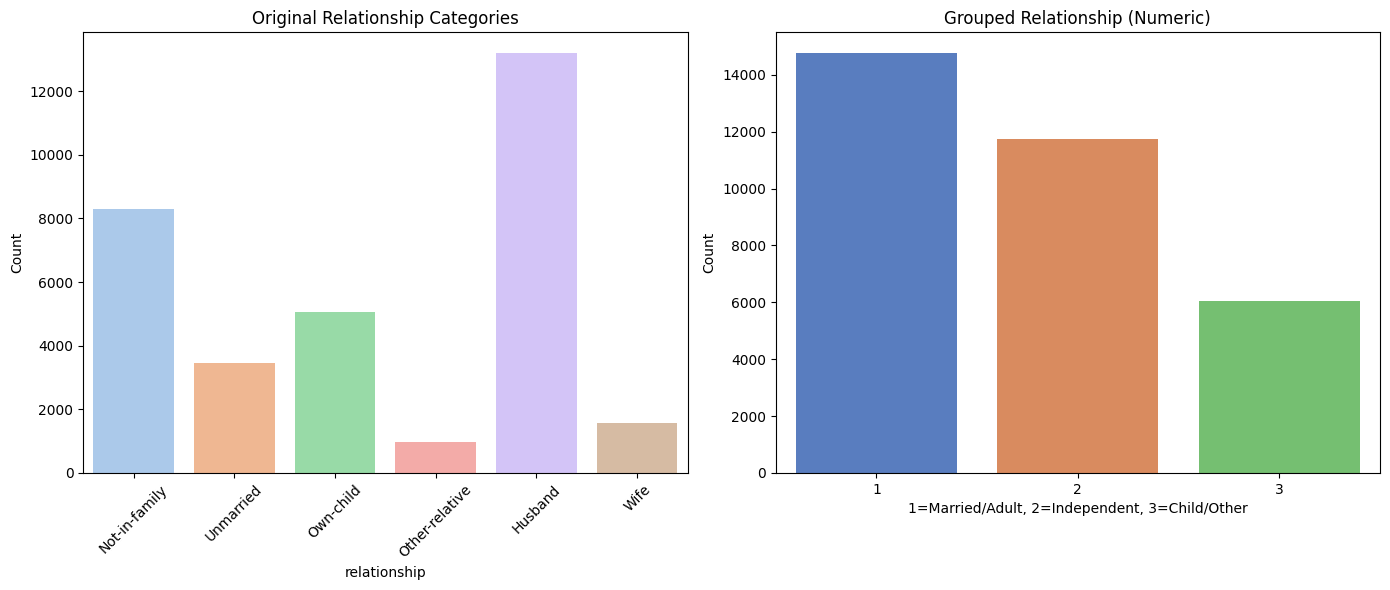

In [91]:
# Recode relationship into 3 main groups
df_processed['relationship_grouped'] = df_processed['relationship'].replace({
    'Husband': 'Married/Adult',
    'Wife': 'Married/Adult',
    'Not-in-family': 'Independent',
    'Unmarried': 'Independent',
    'Own-child': 'Child/Other',
    'Other-relative': 'Child/Other'
})

# Map the 3 groups to numeric codes 1-3
relationship_mapping = {
    'Married/Adult': 1,
    'Independent': 2,
    'Child/Other': 3
}

df_processed['relationship_grouped_num'] = df_processed['relationship_grouped'].map(relationship_mapping)

# Verify the new distribution
print(df_processed[['relationship', 'relationship_grouped', 'relationship_grouped_num']].head())
print(df_processed['relationship_grouped_num'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Original relationship distribution
sns.countplot(x='relationship', data=df_processed, palette='pastel', ax=axes[0])
axes[0].set_title('Original Relationship Categories')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Grouped and numeric encoded relationship
sns.countplot(x='relationship_grouped_num', data=df_processed, palette='muted', ax=axes[1])
axes[1].set_title('Grouped Relationship (Numeric)')
axes[1].set_xlabel('1=Married/Adult, 2=Independent, 3=Child/Other')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


#**7.5 ENCONDE VARIABLE: RACE (CATEGORICAL)**

### Race Variable Recoding

**Original distribution of race`:**

| Race                 | Count | Percentage |
|----------------------|-------|-----------|
| White                | 27795 | 85.43%    |
| Black                | 3122  | 9.60%     |
| Asian-Pac-Islander   | 1038  | 3.19%     |
| Amer-Indian-Eskimo   | 311   | 0.96%     |
| Other                | 271   | 0.83%     |

**Recoding explanation:**  
To avoid bias and ensure representation, we keep only the main groups **White, Black, and Other**, combining smaller minorities (`Asian-Pac-Islander`, `Amer-Indian-Eskimo`) into **Other**.

**New numeric encoding distribution:**

| Race Group | Numeric Code | Approx. Count | Approx. % |
|------------|-------------|---------------|-----------|
| White      | 1           | 27795         | 85.43%    |
| Black      | 2           | 3122          | 9.60%     |
| Other      | 3           | 1620          | 4.97%     |



First 5 rows of race recoding:
    race race_grouped  race_grouped_num
0  White        White                 1
1  White        White                 1
2  Black        Black                 2
3  White        White                 1
4  White        White                 1

Distribution of numeric race codes:
race_grouped_num
1    27795
2     3122
3     1620
Name: count, dtype: int64


/tmp/ipython-input-821634589.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race', data=df_processed, palette='pastel', ax=axes[0])
/tmp/ipython-input-821634589.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/tmp/ipython-input-821634589.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race_grouped_num', data=df_processed, palette='muted', ax=axes[1])


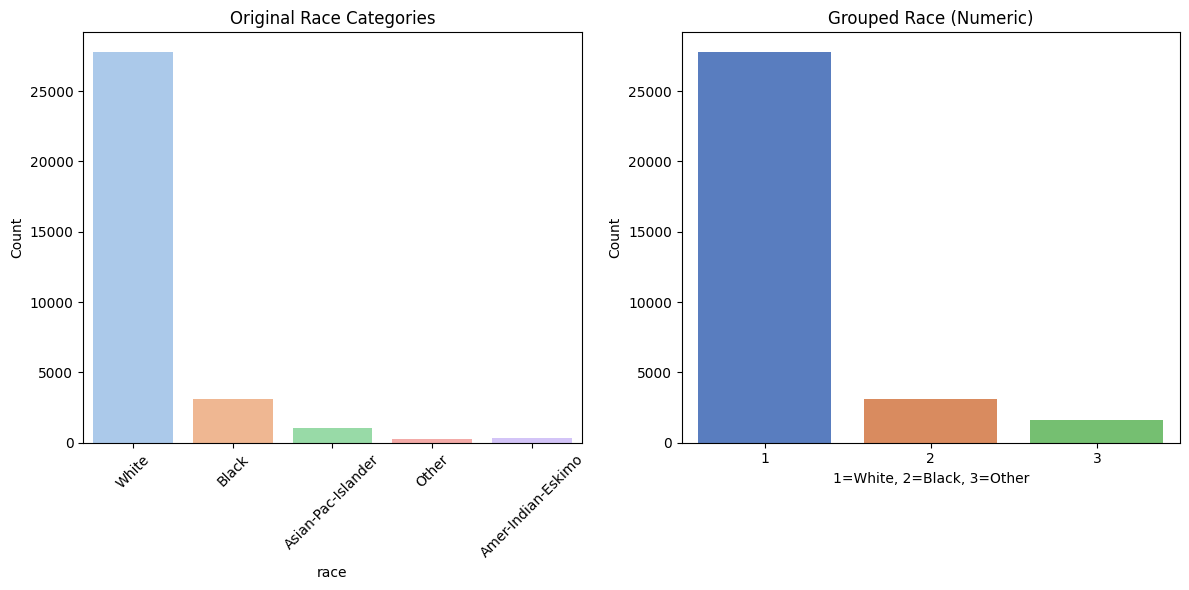

In [92]:
# Race recoding
df_processed['race_grouped'] = df_processed['race'].replace({
    'White': 'White',
    'Black': 'Black',
    'Asian-Pac-Islander': 'Other',
    'Amer-Indian-Eskimo': 'Other',
    'Other': 'Other'
})

# Map the grouped races to numeric codes
race_mapping = {'White': 1, 'Black': 2, 'Other': 3}
df_processed['race_grouped_num'] = df_processed['race_grouped'].map(race_mapping)

# -----------------------------
# Verify the recoding and numeric transformation
print("First 5 rows of race recoding:")
print(df_processed[['race', 'race_grouped', 'race_grouped_num']].head())

print("\nDistribution of numeric race codes:")
print(df_processed['race_grouped_num'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Original race distribution
sns.countplot(x='race', data=df_processed, palette='pastel', ax=axes[0])
axes[0].set_title('Original Race Categories')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Grouped and numeric encoded race
sns.countplot(x='race_grouped_num', data=df_processed, palette='muted', ax=axes[1])
axes[1].set_title('Grouped Race (Numeric)')
axes[1].set_xlabel('1=White, 2=Black, 3=Other')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



#**7.6 ENCODE VARIABLE: SEX (BINOMINAL)**

First 5 rows of sex recoding:
      sex  sex_num
0  Female        2
1  Female        2
2  Female        2
3  Female        2
4  Female        2

Distribution of numeric sex codes:
sex_num
1    21775
2    10762
Name: count, dtype: int64


/tmp/ipython-input-1078754315.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df_processed, palette='pastel', ax=axes[0])
/tmp/ipython-input-1078754315.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex_num', data=df_processed, palette='muted', ax=axes[1])


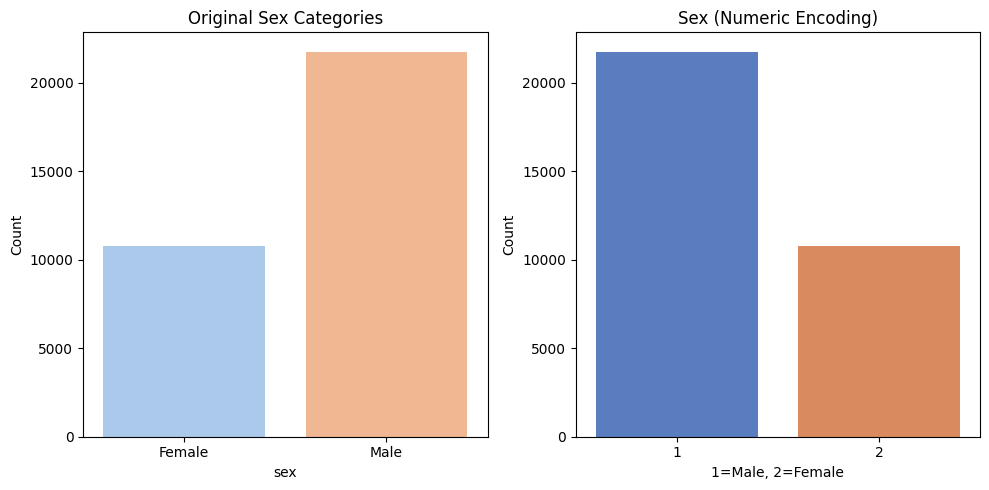

In [93]:
# Sex recoding
sex_mapping = {'Male': 1, 'Female': 2}
df_processed['sex_num'] = df_processed['sex'].map(sex_mapping)

# Verify the recoding and numeric transformation
print("First 5 rows of sex recoding:")
print(df_processed[['sex', 'sex_num']].head())

print("\nDistribution of numeric sex codes:")
print(df_processed['sex_num'].value_counts())

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Original sex distribution
sns.countplot(x='sex', data=df_processed, palette='pastel', ax=axes[0])
axes[0].set_title('Original Sex Categories')
axes[0].set_ylabel('Count')

# Numeric encoded sex
sns.countplot(x='sex_num', data=df_processed, palette='muted', ax=axes[1])
axes[1].set_title('Sex (Numeric Encoding)')
axes[1].set_xlabel('1=Male, 2=Female')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


#**7.7 ENCONDE VARIABE: NATIVE COUNTRY (CATEGORICAL)**

First 5 rows of native country recoding:
  native.country native_country_grouped  native_country_grouped_num
0  United-States          United-States                           1
1  United-States          United-States                           1
2  United-States          United-States                           1
3  United-States          United-States                           1
4  United-States          United-States                           1

Distribution of numeric native country codes:
native_country_grouped_num
1    29735
2     2802
Name: count, dtype: int64


/tmp/ipython-input-2566844300.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='native.country', data=df_processed, palette='pastel', ax=axes[0])
/tmp/ipython-input-2566844300.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/tmp/ipython-input-2566844300.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='native_country_grouped_num', data=df_processed, palette='muted', ax=axes[1])


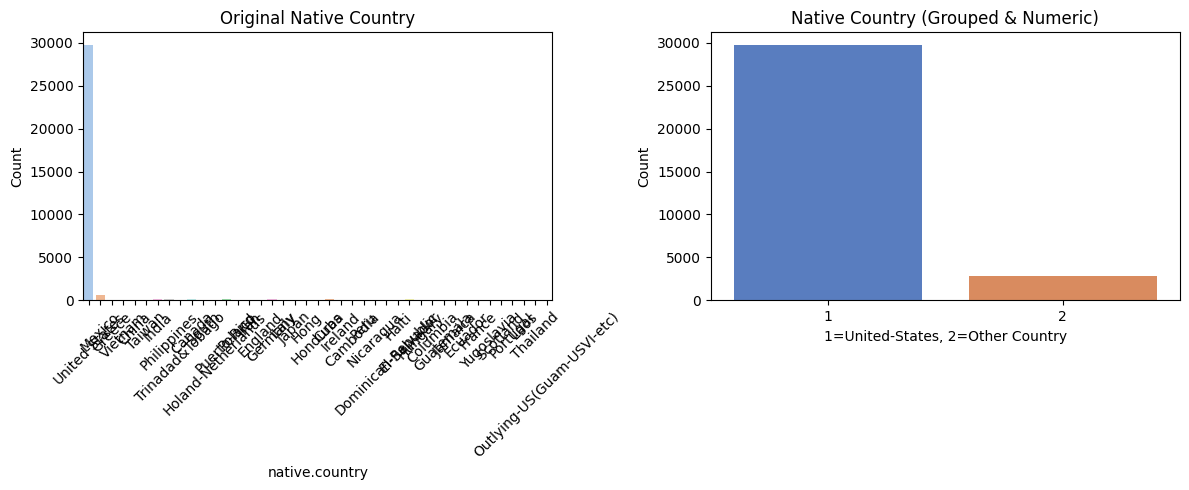

In [94]:

# Native country recoding
df_processed['native_country_grouped'] = df_processed['native.country'].apply(
    lambda x: 'United-States' if x == 'United-States' else 'Other Country'
)

# Map to numeric codes
native_country_mapping = {'United-States': 1, 'Other Country': 2}
df_processed['native_country_grouped_num'] = df_processed['native_country_grouped'].map(native_country_mapping)

# Verify the recoding and numeric transformation
print("First 5 rows of native country recoding:")
print(df_processed[['native.country', 'native_country_grouped', 'native_country_grouped_num']].head())

print("\nDistribution of numeric native country codes:")
print(df_processed['native_country_grouped_num'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Original native country distribution
sns.countplot(x='native.country', data=df_processed, palette='pastel', ax=axes[0])
axes[0].set_title('Original Native Country')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Grouped and numeric encoded native country
sns.countplot(x='native_country_grouped_num', data=df_processed, palette='muted', ax=axes[1])
axes[1].set_title('Native Country (Grouped & Numeric)')
axes[1].set_xlabel('1=United-States, 2=Other Country')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



#**7.8 ENCONDE VARIABLES ORDINALS: EDUCATION AND INCOME**

#**7.8.1 EDUCATION**

The education variable is currently represented by numbers, and the system treats it as a continuous variable. However, it is actually an ordinal variable where the values range from 1 to 16, and each number corresponds to a specific educational level.




| Education Code | Education Level | Count |
|----------------|-----------------|--------|
| 1  | Preschool      | 50    |
| 2  | 1st–4th        | 166   |
| 3  | 5th–6th        | 332   |
| 4  | 7th–8th        | 645   |
| 5  | 9th            | 514   |
| 6  | 10th           | 933   |
| 7  | 11th           | 1175  |
| 8  | 12th           | 433   |
| 9  | HS-grad        | 10494 |
| 10 | Some-college   | 7282  |
| 11 | Assoc-voc      | 1382  |
| 12 | Assoc-acdm     | 1067  |
| 13 | Prof-school    | 5353  |
| 14 | Bachelors      | 1722  |
| 15 | Masters        | 576   |
| 16 | Doctorate      | 413   |


In [65]:
# Count the number of observations for each education level
education_counts = df_processed['education.num'].value_counts().sort_index()

# Display the counts
print("Number of observations per education level:")
print(education_counts)



Number of observations per education level:
education.num
1        50
2       166
3       332
4       645
5       514
6       933
7      1175
8       433
9     10494
10     7282
11     1382
12     1067
13     5353
14     1722
15      576
16      413
Name: count, dtype: int64


This categorization preserves semantic coherence across stages of formal education while reducing variability among categories.

| Education Group                         | Codes  | Included Levels                             | Total People |
|----------------------------------------|--------|---------------------------------------------|--------------|
| Primary Education                        | 1–4    | Preschool, 1st–4th, 5th–6th, 7th–8th       | 1,193        |
| Secondary Education                      | 5–8    | 9th, 10th, 11th, 12th                       | 3,055        |
| High School Graduate / Some College      | 9–10   | HS-grad, Some-college                        | 17,776       |
| Technical or Associate Degree            | 11–12  | Assoc-voc, Assoc-acdm                        | 2,449        |
| Higher Education and Graduate Studies    | 13–16  | Prof-school, Bachelors, Masters, Doctorate  | 8,064        |


Counts per education group:
education_group
1     1193
2     3055
3    17776
4     2449
5     8064
Name: count, dtype: int64

Percentage per education group:
education_group
1     3.666595
2     9.389311
3    54.633187
4     7.526816
5    24.784092
Name: proportion, dtype: float64


/tmp/ipython-input-3410333529.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education.num', data=df_processed, palette='pastel', ax=axes[0])
/tmp/ipython-input-3410333529.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education_group', data=df_processed, palette='muted', ax=axes[1])


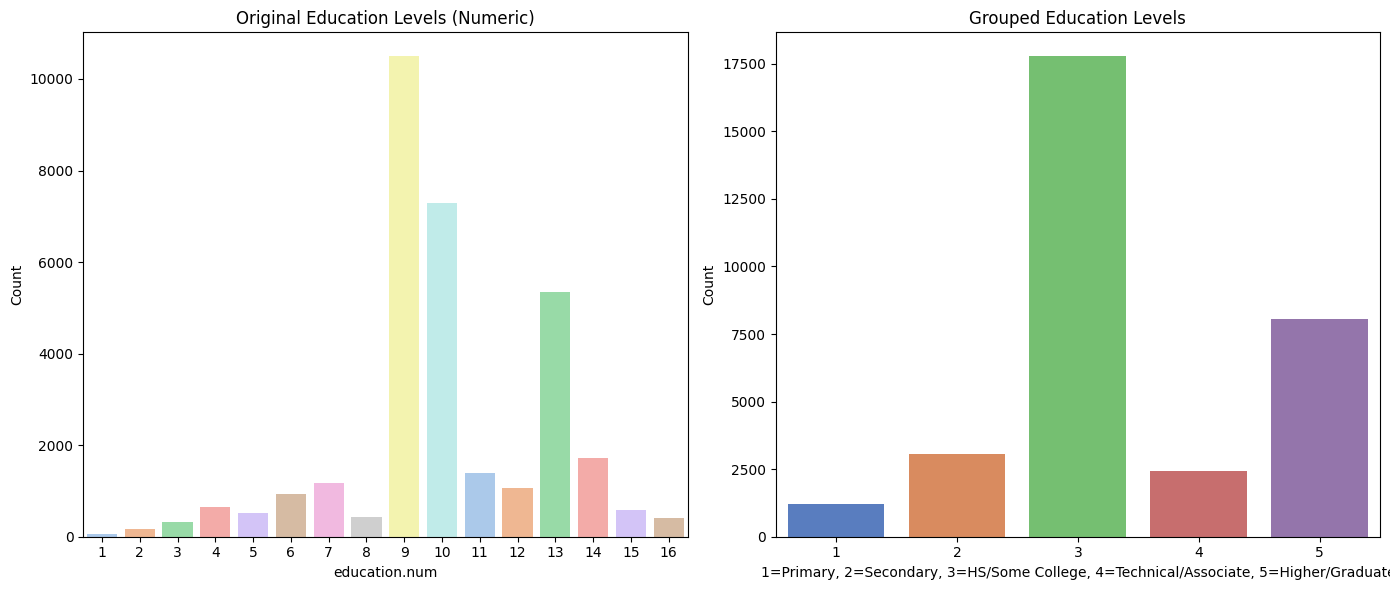

In [98]:
# Step 1: Define a function to group education levels
def group_education(code):
    if code in [1, 2, 3, 4]:
        return 1  # Primary Education
    elif code in [5, 6, 7, 8]:
        return 2  # Secondary Education
    elif code in [9, 10]:
        return 3  # High School Graduate / Some College
    elif code in [11, 12]:
        return 4  # Technical or Associate Degree
    elif code in [13, 14, 15, 16]:
        return 5  # Higher Education and Graduate Studies
    else:
        return None  # Handle missing or unexpected values

# Step 2: Apply the function to create a new column
df_processed['education_group'] = df_processed['education.num'].apply(group_education)

# Step 3: Verify the counts for each new group
group_counts = df_processed['education_group'].value_counts().sort_index()
print("Counts per education group:")
print(group_counts)

# Step 4: Optional - show percentages
group_percent = df_processed['education_group'].value_counts(normalize=True).sort_index() * 100
print("\nPercentage per education group:")
print(group_percent)

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Original education.num distribution
sns.countplot(x='education.num', data=df_processed, palette='pastel', ax=axes[0])
axes[0].set_title('Original Education Levels (Numeric)')
axes[0].set_ylabel('Count')

# Grouped education distribution
sns.countplot(x='education_group', data=df_processed, palette='muted', ax=axes[1])
axes[1].set_title('Grouped Education Levels')
axes[1].set_xlabel('1=Primary, 2=Secondary, 3=HS/Some College, 4=Technical/Associate, 5=Higher/Graduate')
axes[1].set_ylabel('Count')


plt.tight_layout()
plt.show()

#**7.8.2 INCOME**

Counts for income_bin:
income_bin
0    24698
1     7839
Name: count, dtype: int64
First 5 rows after encoding:


,income,income_bin
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0


/tmp/ipython-input-584897990.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='pastel', ax=axes[0])
/tmp/ipython-input-584897990.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income_bin', data=df, palette='muted', ax=axes[1])


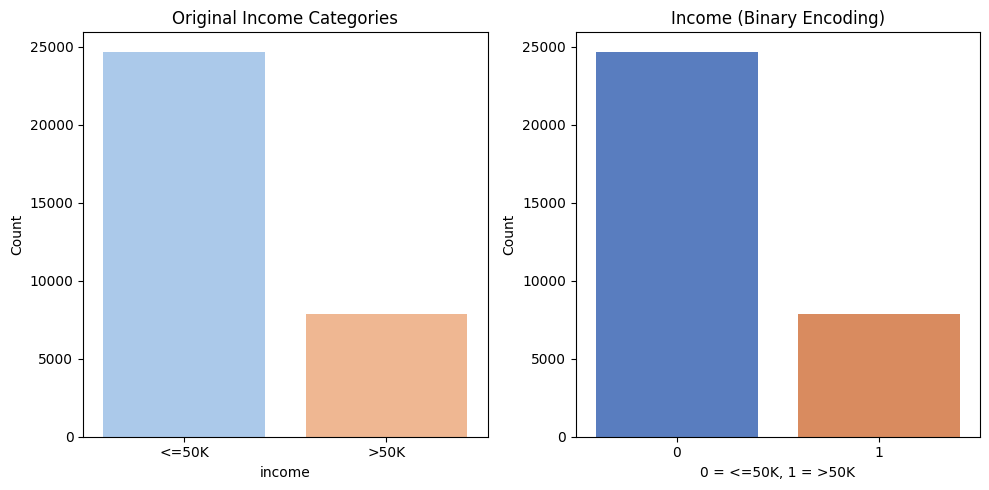

In [97]:
# Step 1: Encode the income variable
# Assign 0 for '<=50K' and 1 for '>50K'
df['income_bin'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

# Step 2: Verify counts
income_counts = df['income_bin'].value_counts().sort_index()
print("Counts for income_bin:")
print(income_counts)

# Step 3: Verify the first 5 rows
print("First 5 rows after encoding:")
display(df[['income', 'income_bin']].head())

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Original income distribution
sns.countplot(x='income', data=df, palette='pastel', ax=axes[0])
axes[0].set_title('Original Income Categories')
axes[0].set_ylabel('Count')

# Binary encoded income
sns.countplot(x='income_bin', data=df, palette='muted', ax=axes[1])
axes[1].set_title('Income (Binary Encoding)')
axes[1].set_xlabel('0 = <=50K, 1 = >50K')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


#**STEP 8. FEATURES SCALING AND NORMALIZATON**

#**8.1 AGE**

#**8.1.2.AGE  Z-SCORE**

In [69]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler_standard = StandardScaler()

# Select only 'age' for scaling
features_to_scale = ['age']

# Copy the original dataframe
df_standard_scaled = df.copy()

# Fit and transform the 'age' column
df_standard_scaled[features_to_scale] = scaler_standard.fit_transform(df[features_to_scale])

# Verify results
print("Standard Scaling Applied to 'age':")
print("\nFeatures scaled (mean=0, std=1):")
print(df_standard_scaled[features_to_scale].describe().round(3))


Standard Scaling Applied to 'age':

Features scaled (mean=0, std=1):
             age
count  32537.000
mean      -0.000
std        1.000
min       -1.583
25%       -0.776
50%       -0.116
75%        0.690
max        3.770


#**8.1.2.AGE Min-Max Scaling (0-1 normalization)**

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler_age = MinMaxScaler()
df_minmax_age = df.copy()
df_minmax_age[['age']] = scaler_age.fit_transform(df[['age']])

print("Min-Max Scaling Applied to 'age':")
print(df_minmax_age[['age']].describe().round(3))

# Additional verification: check min and max values
print("\nMin value:", df_minmax_age['age'].min())
print("Max value:", df_minmax_age['age'].max())

# Optional: check first 5 rows
display(df_minmax_age[['age']].head())

Min-Max Scaling Applied to 'age':
             age
count  32537.000
mean       0.296
std        0.187
min        0.000
25%        0.151
50%        0.274
75%        0.425
max        1.000

Min value: 0.0
Max value: 1.0


,age
0,1.000000
1,0.890411
2,0.671233
3,0.506849
4,0.328767


#**8.2. HOUR.PEER.WEEK**

#**8.2.1 HOUR.PEER.WEEK Z-SCORE**

In [70]:
from sklearn.preprocessing import StandardScaler

# Select only 'hours.per.week' for scaling
features_to_scale = ['hours.per.week']

# Copy the original dataframe
df_standard_scaled = df.copy()

# Fit and transform the 'hours.per.week' column
df_standard_scaled[features_to_scale] = scaler_standard.fit_transform(df[features_to_scale])

# Verify results
print("Standard Scaling Applied to 'hours.per.week':")
print("\nFeatures scaled (mean=0, std=1):")
print(df_standard_scaled[features_to_scale].describe().round(3))


Standard Scaling Applied to 'hours.per.week':

Features scaled (mean=0, std=1):
       hours.per.week
count       32537.000
mean           -0.000
std             1.000
min            -3.194
25%            -0.036
50%            -0.036
75%             0.369
max             4.743


#**8.2.2 HOUR.PEER.WEEK Min-Max Scaling (0-1 normalization)**

In [75]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler for hours.per.week
scaler_hours = MinMaxScaler()
df_minmax_hours = df.copy()

# Fit and transform only 'hours.per.week'
df_minmax_hours[['hours.per.week']] = scaler_hours.fit_transform(df[['hours.per.week']])

# Verify results
print("Min-Max Scaling Applied to 'hours.per.week':")
print(df_minmax_hours[['hours.per.week']].describe().round(3))

# Additional verification: check min and max values
print("\nMin value:", df_minmax_hours['hours.per.week'].min())
print("Max value:", df_minmax_hours['hours.per.week'].max())

# Optional: check first 5 rows
display(df_minmax_hours[['hours.per.week']].head())

Min-Max Scaling Applied to 'hours.per.week':
       hours.per.week
count       32537.000
mean            0.402
std             0.126
min             0.000
25%             0.398
50%             0.398
75%             0.449
max             1.000

Min value: 0.0
Max value: 0.9999999999999999


,hours.per.week
0,0.397959
1,0.173469
2,0.397959
3,0.397959
4,0.397959


**#8.3 VISUALIZE AND COMPARE SCALING METHOD (AGE AND HOURS.PER.WEEK)**

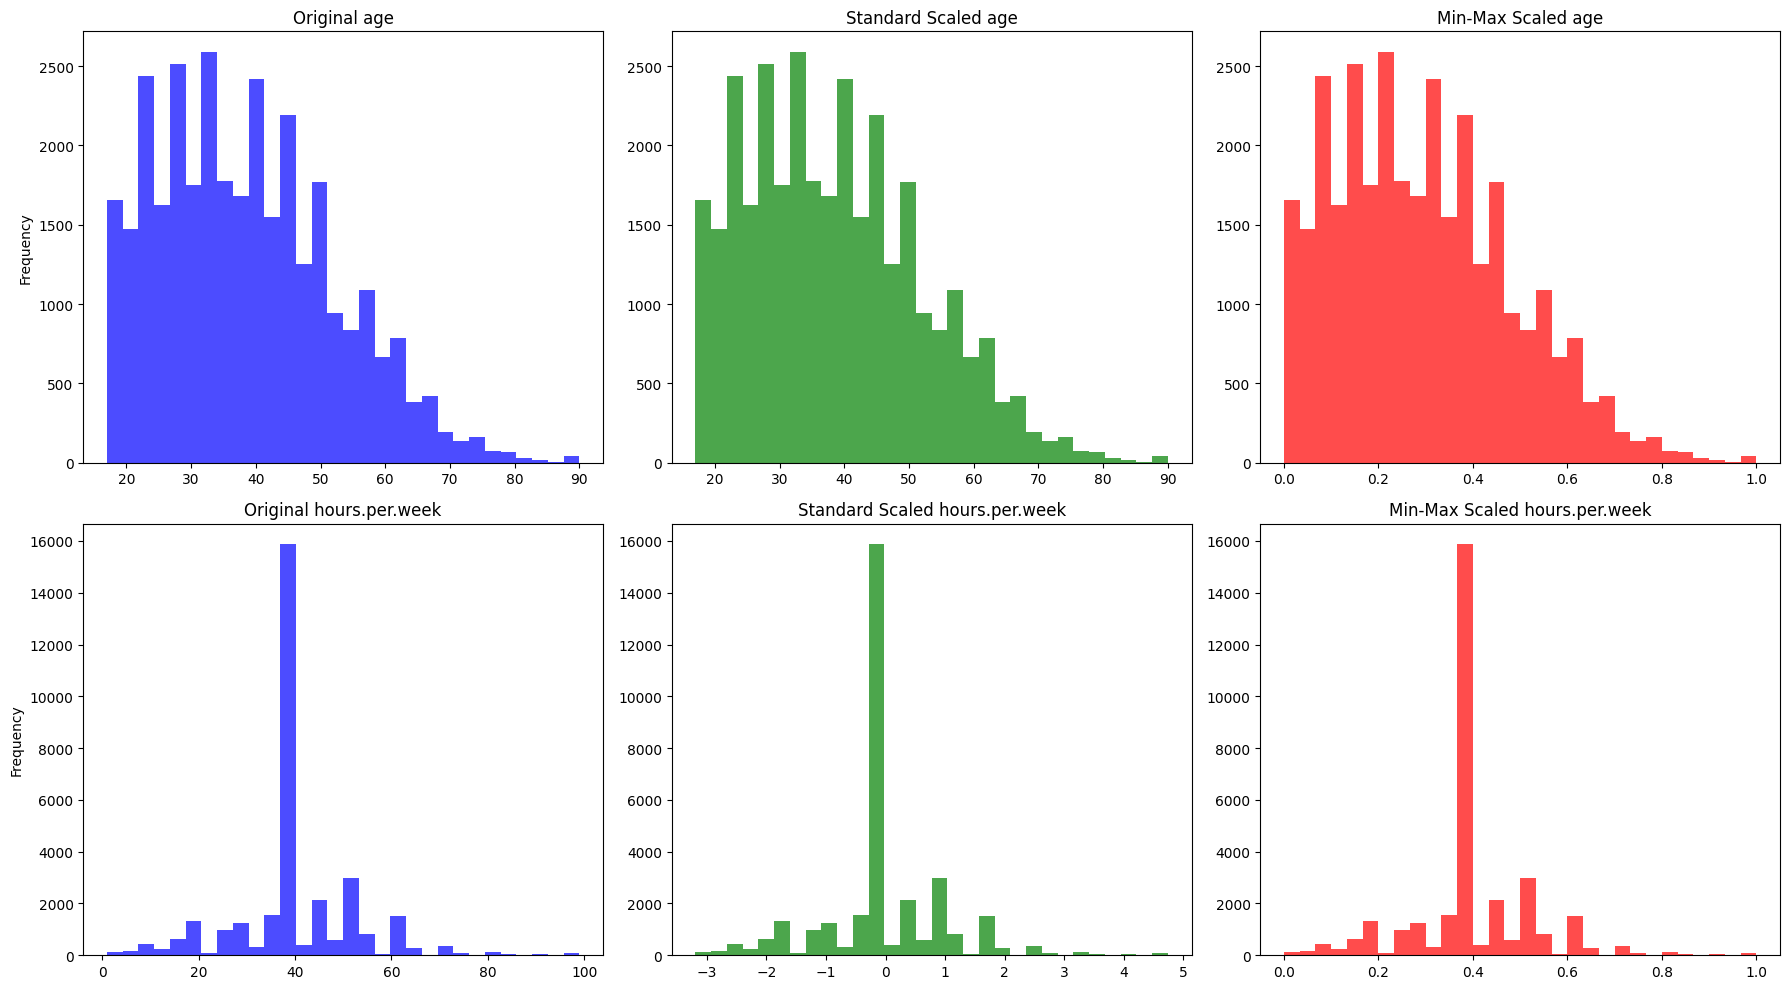

In [80]:
import matplotlib.pyplot as plt

# Compare scaling methods for 'age' and 'hours.per.week'
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

comparison_features = ['age', 'hours.per.week']

for i, feature in enumerate(comparison_features):
    # Original
    axes[i, 0].hist(df[feature], bins=30, alpha=0.7, color='blue')
    axes[i, 0].set_title(f'Original {feature}')
    axes[i, 0].set_ylabel('Frequency')

    # Standard scaled (Z-score)
    axes[i, 1].hist(df_standard_scaled[feature], bins=30, alpha=0.7, color='green')
    axes[i, 1].set_title(f'Standard Scaled {feature}')

    # Min-Max scaled
    axes[i, 2].hist(df_minmax_scaled[feature], bins=30, alpha=0.7, color='red')
    axes[i, 2].set_title(f'Min-Max Scaled {feature}')

plt.tight_layout()
plt.show()


#**STEP 9.HANDLE OUTLIER (AGE AND HOURS.PEER.WEEK VARIABLES)**

Outliers capped for 'age' and 'hours.per.week' in df_outlier_treated.

Descriptive statistics after capping:


,age,hours.per.week
count,32537.00,32537.00
mean,38.56,41.20
std,13.55,6.19
min,17.00,32.50
25%,28.00,40.00
50%,37.00,40.00
75%,48.00,45.00
max,78.00,52.50


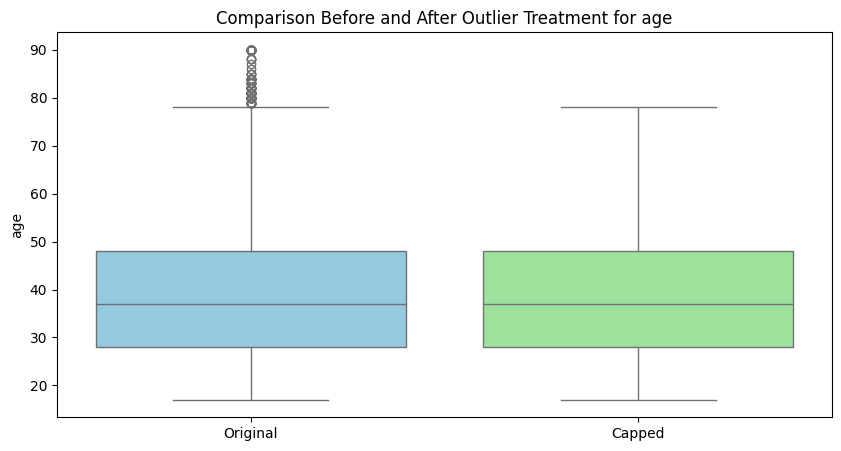

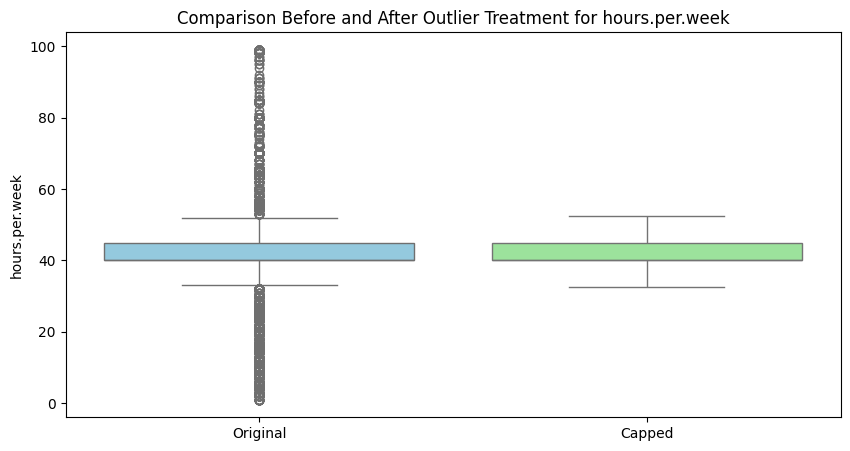

In [102]:
# Function to cap outliers using IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a copy to avoid modifying the original dataframe directly
    df_capped = df.copy()

    df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Apply capping to 'age' and 'hours.per.week'
df_outlier_treated = cap_outliers_iqr(df_processed, 'age')
df_outlier_treated = cap_outliers_iqr(df_outlier_treated, 'hours.per.week')

print("Outliers capped for 'age' and 'hours.per.week' in df_outlier_treated.")

# Verify the effect of capping on descriptive statistics
print("\nDescriptive statistics after capping:")
display(df_outlier_treated[['age', 'hours.per.week']].describe().round(2))

# Variables a comparar
variables = ['age', 'hours.per.week']

for col in variables:
    plt.figure(figsize=(10,5))
    # Antes del capping
    sns.boxplot(x=['Original']*len(df_processed), y=df_processed[col], color='skyblue')
    # Después del capping
    sns.boxplot(x=['Capped']*len(df_outlier_treated), y=df_outlier_treated[col], color='lightgreen')

    plt.title(f'Comparison Before and After Outlier Treatment for {col}')
    plt.ylabel(col)
    plt.show()